In [1]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error, accuracy_score

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [491]:
df = pd.read_csv('motorcycle_model_ready_data')

In [492]:
df = df[['title', 'year', 'price', 'condition', 'engine_size', 'mileage', 'bobbe', 
        'cafe ', 'chopp', 'cruis', 'dirtb', 'dual-', 'moped', 'other', 'scoot', 
        'sport', 'stand', 'stree', 'touri', 'trike']].copy()
# df.drop(df.columns[0], axis=1, inplace=True)
keepidx = (df.title.drop_duplicates().index)
df = df.loc[keepidx].copy()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.drop([3644, 2143], inplace=True)
df = df[df.engine_size != 895.5236939583598]
df = df[df.mileage != 14077.35348599088]
df = df[df.engine_size > 45]
df = df[df.price >= 600]
df = df[df.price <= 22000]
df = df.reset_index(drop=True)
for idx, i in enumerate(df['title']):
    if 'payment' in i.lower():
        df.drop(idx, axis=0, inplace = True)
        
df = df.reset_index(drop=True) 
len(df)

6719

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        6719 non-null   object 
 1   year         6719 non-null   float64
 2   price        6719 non-null   float64
 3   condition    6719 non-null   int64  
 4   engine_size  6719 non-null   float64
 5   mileage      6719 non-null   float64
 6   bobbe        6719 non-null   int64  
 7   cafe         6719 non-null   int64  
 8   chopp        6719 non-null   int64  
 9   cruis        6719 non-null   int64  
 10  dirtb        6719 non-null   int64  
 11  dual-        6719 non-null   int64  
 12  moped        6719 non-null   int64  
 13  other        6719 non-null   int64  
 14  scoot        6719 non-null   int64  
 15  sport        6719 non-null   int64  
 16  stand        6719 non-null   int64  
 17  stree        6719 non-null   int64  
 18  touri        6719 non-null   int64  
 19  trike 

In [493]:
X = df.drop(['price', 'title'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

model = GradientBoostingRegressor(n_estimators=980, 
                                max_depth=6,
                                learning_rate=.01, 
                                min_samples_leaf=2,
                                min_samples_split=3)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('R Squared: ', round(model.score(X_test, y_test), 4))
print('RMSE: \t ', '$',round(np.sqrt(mean_squared_error(y_test, y_hat)),0))

R Squared:  0.7536
RMSE: 	  $ 2186.0


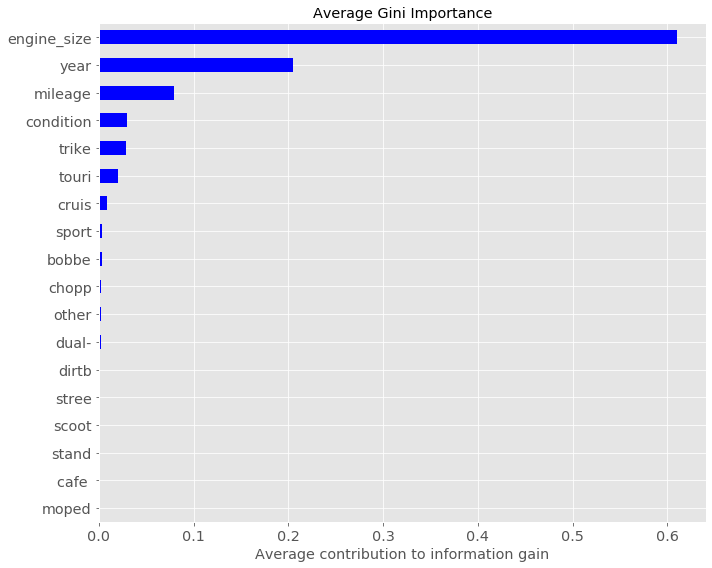

In [498]:
feat_scores = pd.Series(model.feature_importances_,
                           index=df.drop(['price', 'title'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [408]:
cat_features = ['title', 'bobbe', 'cafe ', 'chopp', 'cruis', 'dirtb', 'dual-', 'moped', 'other', 'scoot', 'sport', 'stand', 'stree', 'touri']
num_features = ['year', 'price', 'condition', 'mileage', 'engine_size']

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


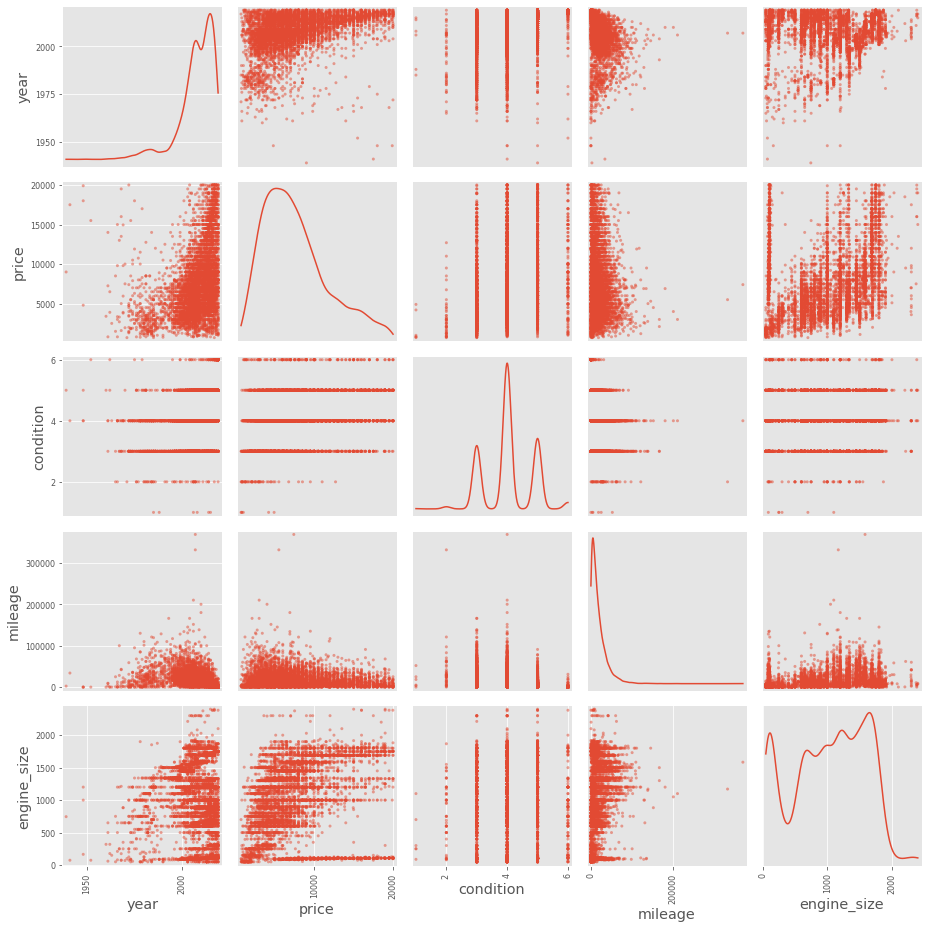

In [409]:
fig, ax = plt.subplots(1, 1, figsize=(13, 13))
plt.xlabel("Numerical Features")
plt.ylabel("Numerical Features")
plt.title("Motorcycle Dataframe Scatter Matrix")
ax = pd.plotting.scatter_matrix(df[num_features], ax=ax, diagonal='kde')
plt.tight_layout()
plt.show()

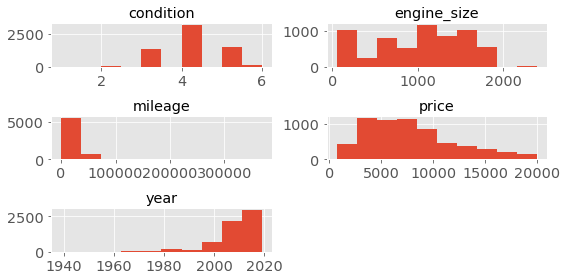

In [410]:
ax = df[num_features].hist(bins=10)
plt.tight_layout()

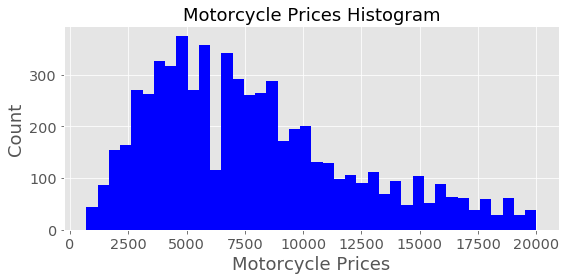

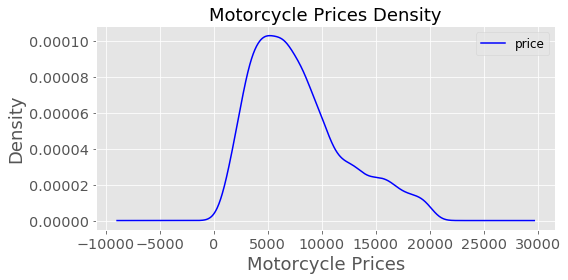

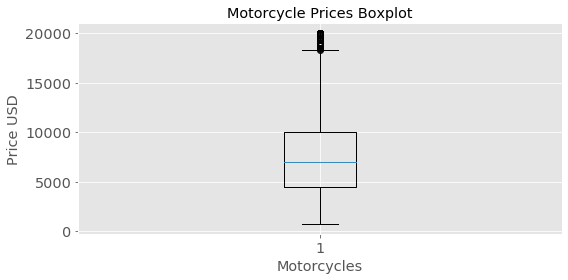

In [411]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Motorcycle years Histogram')

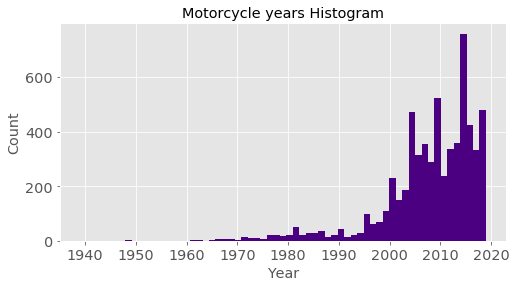

In [412]:
plt.hist(df['year'], len(np.unique(df.year)), color = 'indigo')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Motorcycle years Histogram')

Text(0.5, 1.0, 'Motorcycle Condition Histogram')

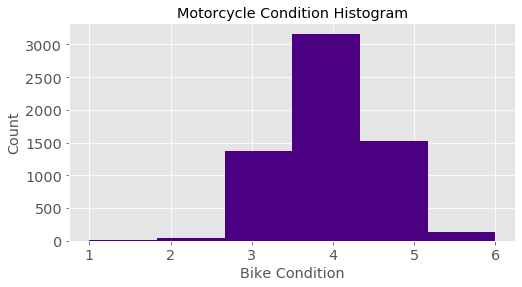

In [413]:
plt.hist(df['condition'], 6, color='indigo')
plt.xlabel('Bike Condition')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

Text(0.5, 1.0, 'Motorcycle Condition Histogram')

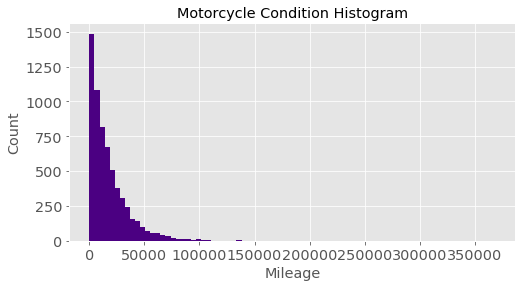

In [414]:
plt.hist(df['mileage'], 80, color= 'indigo')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

Text(0.5, 1.0, 'Motorcycle Condition Histogram')

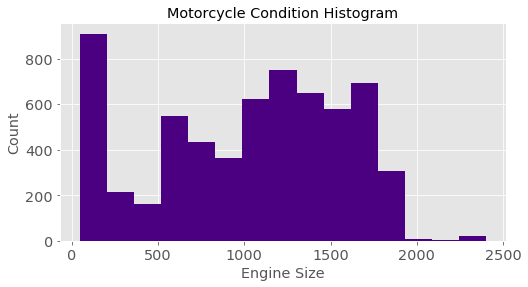

In [415]:
plt.hist(df['engine_size'], 15, color = 'indigo')
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

In [417]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


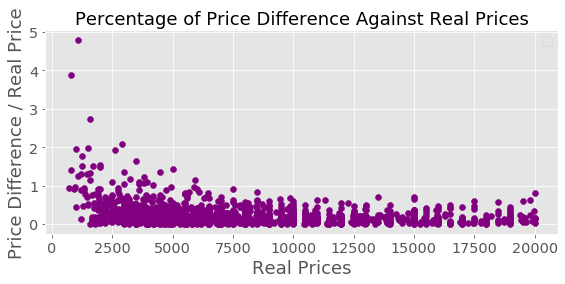

In [418]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


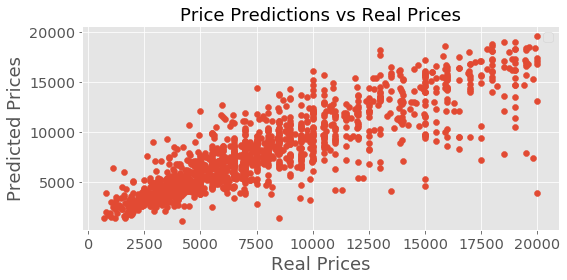

In [419]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

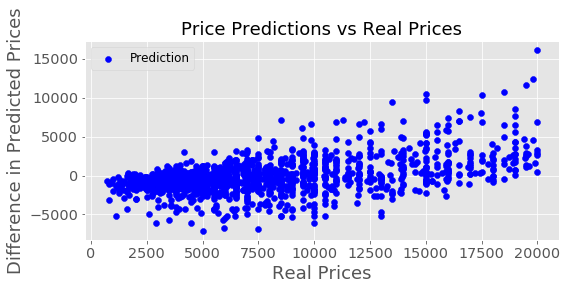

In [420]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [422]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [423]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))

analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

In [424]:
analysis_df['diff'] = diff
analysis_df['diff_percent'] = diff_percent
analysis_df['pos_or_neg'] = pos_or_neg

In [425]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [426]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 2840 to 3475
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1384 non-null   object 
 1   pos_or_neg    1384 non-null   object 
 2   diff          1384 non-null   float64
 3   diff_percent  1384 non-null   float64
 4   price         1384 non-null   float64
 5   year          1384 non-null   float64
 6   mileage       1384 non-null   float64
 7   engine_size   1384 non-null   float64
 8   condition     1384 non-null   int64  
 9   bobbe         1384 non-null   int64  
 10  cafe          1384 non-null   int64  
 11  chopp         1384 non-null   int64  
 12  cruis         1384 non-null   int64  
 13  dirtb         1384 non-null   int64  
 14  dual-         1384 non-null   int64  
 15  moped         1384 non-null   int64  
 16  other         1384 non-null   int64  
 17  scoot         1384 non-null   int64  
 18  sport         1384 non-nu

In [427]:
adf_idx = analysis_df['diff_percent'].sort_values().index

In [431]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,year,mileage,engine_size,condition,bobbe,...,cruis,dirtb,dual-,moped,other,scoot,sport,stand,stree,touri
2762,goldwing 2001 low miles,short -,4800.960,0.842274,6995.0,2001.0,44000.0,1800.0,4,0,...,0,0,0,0,0,0,0,0,0,1
366,2009 Honda Metropolitan Scooter,short -,5154.745,0.845040,975.0,2009.0,3307.0,49.0,4,0,...,0,0,0,0,0,1,0,0,0,0
2307,2007 Honda VTX 1300R,short -,2338.760,0.850458,5000.0,2007.0,26800.0,1300.0,4,0,...,1,0,0,0,0,0,0,0,0,0
3195,2007 Honda vtx 1300c motorcycle,short -,1053.975,0.878312,3500.0,2007.0,10631.0,1300.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1262,2018 BLOWOUT!!! Honda CBR650F sport motorcycle,short -,1192.165,0.883085,6799.0,2018.0,10932.0,650.0,4,0,...,0,0,0,0,0,0,1,0,0,0
3240,2000 Harley davidson,short -,3180.630,0.883508,6500.0,2000.0,16585.0,1450.0,4,0,...,1,0,0,0,0,0,0,0,0,0
1386,2013 Ducati Diavel AMG Carbon,short -,4209.750,0.886263,14500.0,2013.0,8200.0,1294.0,4,0,...,0,0,0,0,0,0,1,0,0,0
2054,2014 Kawasaki Ninja ZX-6R Warranty and Financing,short -,811.410,0.901567,7399.0,2014.0,11838.0,636.0,4,0,...,0,0,0,0,0,0,1,0,0,0
4042,2011 Kawasaki Versys,short -,1715.555,0.902924,4000.0,2011.0,5482.0,650.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1195,2019 Yamaha Bolt R SPEC,short -,5467.215,0.911203,8100.0,2019.0,687.0,950.0,5,1,...,0,0,0,0,0,0,0,0,0,0
